<a href="https://colab.research.google.com/github/RoyAru11/Prob-Stat/blob/main/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()


In [2]:
N=100
x=np.random.uniform(low=-1.0, high=1.0, size=N)
y=np.sqrt(1-x**2)
V=2

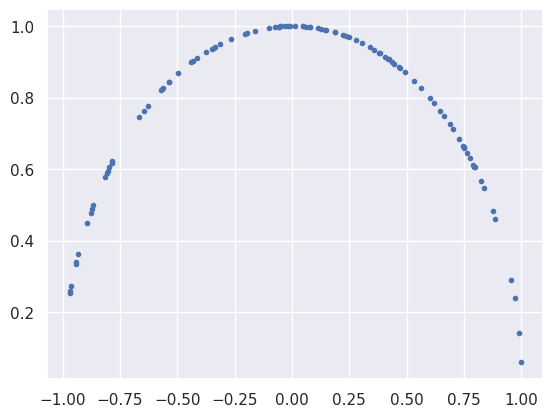

In [3]:
plt.plot(x,y,'.')

In [4]:
np.mean(y)*V

np.float64(1.5472466687251956)

In [5]:
N = 10000
x = np.random.uniform(low=-1.0, high=1.0, size=N)
y = np.sqrt(1 - x**2)
V = 2
print('Approximation = ', np.mean(y) * V)
print('Built-in value = ', np.pi / 2)

Approximation =  1.566068950236016
Built-in value =  1.5707963267948966


In [6]:
def simulate(N=50, seed=65594):
  if seed == None:
    pass
  else:
    np.random.seed(seed)
  # Let's ensure that x_1 and x_2 are correlated
  cov = np.array([[2,1],
                  [1,2]])
  mean = np.array([0, 0])
  X = scipy.stats.multivariate_normal.rvs(mean=mean, cov=cov, size=N)
  epsilon = np.random.randn(N,1)
  beta0, beta1, beta2 = 0, 1, 1
  df = pd.DataFrame(X, columns=['x1', 'x2'])
  df['epsilon'] = epsilon
  df['y'] = beta0 + beta1 * df.x1 + beta2 * df.x2 + df.epsilon
  df = df[['y', 'x1', 'x2', 'epsilon']]
  return df

In [7]:
df = simulate()
df.head()

,y,x1,x2,epsilon
0,-3.523875,-3.291118,-0.766711,0.533955
1,1.950385,1.049265,1.727714,-0.826594
2,-2.801970,-0.893403,-1.641974,-0.266593
3,-2.335073,-1.313650,-0.719278,-0.302145
4,2.055765,-1.964512,2.297892,1.722384


In [8]:
reg = smf.ols('y ~ x1', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     11.08
Date:                Thu, 14 Aug 2025   Prob (F-statistic):            0.00168
Time:                        19:10:58   Log-Likelihood:                -94.696
No. Observations:                  50   AIC:                             193.4
Df Residuals:                      48   BIC:                             197.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2197      0.236      0.932      0.356      -0.254       0.694
x1             0.6023      0.181      3.329      0.002       0.239       0.966
==============================================================================
Omnibus:                        1.285   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.526   Jarque-Bera (JB):                1.145
Skew:                           0.195   Prob(JB):                        0.564
Kurtosis:                       2.369   Cond. No.                         1.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
df = simulate(N=50, seed=10954)
reg = smf.ols('y ~ x1', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     11.84
Date:                Thu, 14 Aug 2025   Prob (F-statistic):            0.00121
Time:                        19:10:59   Log-Likelihood:                -94.294
No. Observations:                  50   AIC:                             192.6
Df Residuals:                      48   BIC:                             196.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0818      0.236      0.346      0.731      -0.393       0.557
x1             0.7245      0.211      3.440      0.001       0.301       1.148
==============================================================================
Omnibus:                        0.307   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.408
Skew:                           0.170   Prob(JB):                        0.816
Kurtosis:                       2.717   Cond. No.                         1.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
df.head()

,y,x1,x2,epsilon
0,-1.595358,-1.426465,-1.625479,1.456586
1,1.568702,0.073296,-0.102427,1.597833
2,-0.004672,-1.020370,0.449854,0.565844
3,-1.969594,1.112394,-1.369873,-1.712115
4,0.668894,1.018594,-0.680677,0.330977


In [ ]:
df.cov()

,y,x1,x2,epsilon
y,3.236469,0.883634,1.565503,0.787331
x1,0.883634,1.219660,0.145665,-0.481691
x2,1.565503,0.145665,1.496504,-0.076666
epsilon,0.787331,-0.481691,-0.076666,1.345687


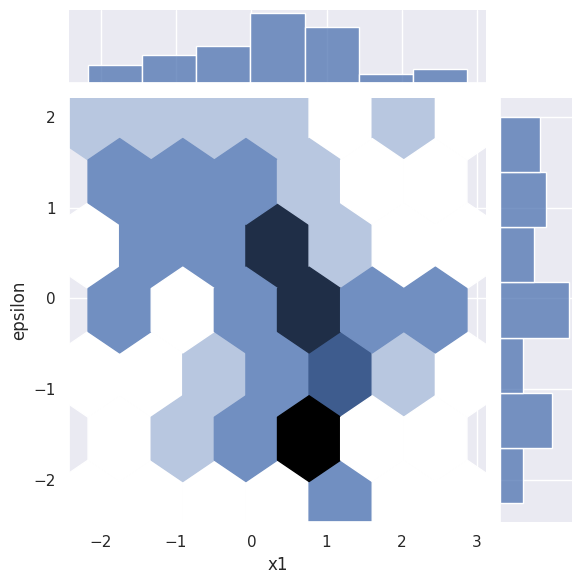

In [11]:
sns.jointplot(x=df.x1, y=df.epsilon, kind="hex")

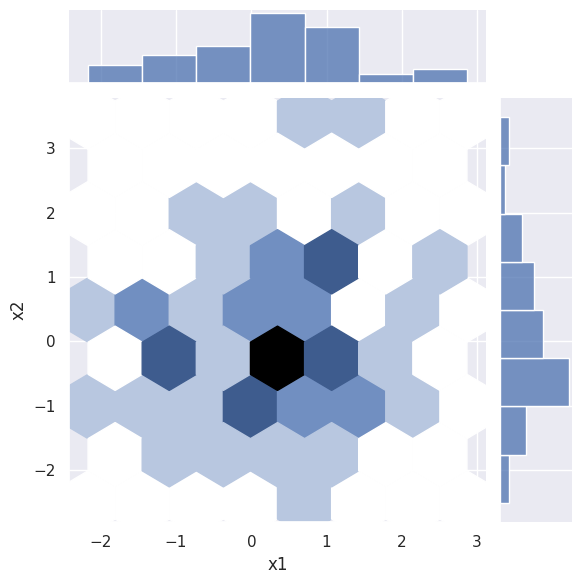

In [12]:
sns.jointplot(x=df.x1, y=df.x2, kind="hex");

In [14]:
df = simulate(N=50, seed=87548)
reg = smf.ols('y ~ x1', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     38.92
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           1.08e-07
Time:                        19:13:01   Log-Likelihood:                -94.126
No. Observations:                  50   AIC:                             192.3
Df Residuals:                      48   BIC:                             196.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8261      0.248      3.328      0.002       0.327       1.325
x1             1.0000      0.160      6.239      0.000       0.678       1.322
==============================================================================
Omnibus:                        3.263   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.275
Skew:                           0.477   Prob(JB):                        0.321
Kurtosis:                       3.428   Cond. No.                         1.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
df = simulate(N=50, seed=75100)
reg = smf.ols('y ~ x1', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     135.8
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           1.35e-15
Time:                        19:13:09   Log-Likelihood:                -92.581
No. Observations:                  50   AIC:                             189.2
Df Residuals:                      48   BIC:                             193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2784      0.223     -1.251      0.217      -0.726       0.169
x1             2.2738      0.195     11.652      0.000       1.881       2.666
==============================================================================
Omnibus:                        4.749   Durbin-Watson:                   2.359
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                3.623
Skew:                           0.539   Prob(JB):                        0.163
Kurtosis:                       3.760   Cond. No.                         1.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df = simulate(N=50, seed=100)
reg = smf.ols('y ~ x1', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     93.81
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           7.13e-13
Time:                        19:18:28   Log-Likelihood:                -95.279
No. Observations:                  50   AIC:                             194.6
Df Residuals:                      48   BIC:                             198.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4779      0.237     -2.019      0.049      -0.954      -0.002
x1             1.7431      0.180      9.686      0.000       1.381       2.105
==============================================================================
Omnibus:                        0.913   Durbin-Watson:                   2.234
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.849
Skew:                          -0.301   Prob(JB):                        0.654
Kurtosis:                       2.788   Cond. No.                         1.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
beta0, beta1, beta2 =0, 1, 1
M=1000
biases=np.zeros(M)
for i in range(M):
  df = simulate(N=50, seed=i)
  reg = smf.ols('y ~ x1', df).fit()
  biases[i]=reg.params.x1 - beta1
np.savetxt('biases_N50_beta011_M100000.txt', biases)

In [19]:
ind_min = np.argmin(biases)
biases[ind_min]

np.float64(0.009645772153451526)

In [20]:
ind_max = np.argmax(biases)
biases[ind_max]

np.float64(1.043100708650424)

In [21]:
ind_amin = np.argmin(np.abs(biases))
biases[ind_amin]

np.float64(0.009645772153451526)

In [22]:
ind_amax = np.argmax(np.abs(biases))
biases[ind_amax]

np.float64(1.043100708650424)

In [23]:
print(ind_min, ind_max, ind_amin, ind_amax)

856 599 856 599


In [28]:
reg.params.index

Index(['Intercept', 'x1'], dtype='object')

In [29]:
M = 10
results = pd.DataFrame(index=range(M), columns=reg.params.index)
results.head()


,Intercept,x1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [31]:
results.loc[0, :] = reg.params
results.head()

,Intercept,x1
0,0.261311,1.38712
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [45]:
np.random.seed(100)
M = 1000
results = pd.DataFrame(index=range(M), columns=reg.params.index, dtype=np.float)
for m in range(M):
    # Set `seed` parameter to `None` so that I don't reset
    # the seed every time.
    df = simulate(seed=None)
    reg = smf.ols('y ~ x1', df).fit()
    results.loc[m, :] = reg.params

/tmp/ipython-input-424812921.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.x1)


<Axes: title={'center': 'x1'}, xlabel='x1', ylabel='Density'>

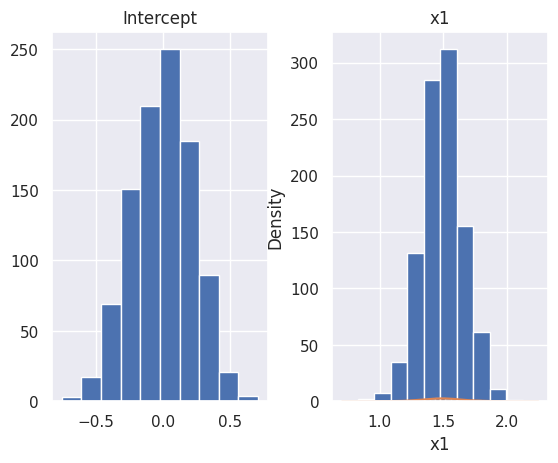

In [36]:
results.hist();
sns.distplot(results.x1)

In [37]:
beta0, beta1, beta2 = 0, 1, 1
c = 1
v = 2
tilde_beta1 = beta1 + beta2 * c/v
tilde_beta1

1.5

In [46]:
np.random.seed(100)
M = 1000
N = 500
results2 = pd.DataFrame(index=range(M), columns=reg.params.index, dtype=float)
for m in range(M):
    # Set `seed` parameter to `None` so that I don't reset
    # the seed every time.
    df = simulate(N=N, seed=None)
    reg = smf.ols('y ~ x1', df).fit()
    results2.loc[m, :] = reg.params

In [47]:

results2.describe()


,Intercept,x1
count,1000.000000,1000.000000
mean,-0.002386,1.498928
std,0.071223,0.050357
min,-0.235509,1.371046
25%,-0.051496,1.464615
50%,-0.003885,1.497385
75%,0.044468,1.535567
max,0.225968,1.690500


/tmp/ipython-input-2164249607.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.x1, label='$N=50$')
/tmp/ipython-input-2164249607.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results2.x1, label='$N=500$')


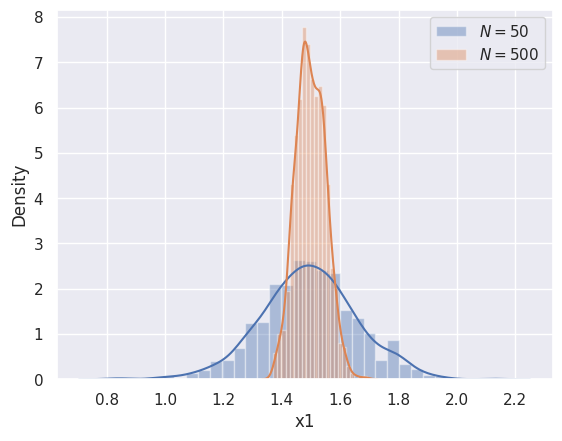

In [49]:
sns.distplot(results.x1, label='$N=50$')
sns.distplot(results2.x1, label='$N=500$')
plt.legend();

In [51]:
np.random.seed(100)
M = 1000
N = 5000
results3 = pd.DataFrame(index=range(M), columns=reg.params.index, dtype=float)
for m in range(M):
    # Set `seed` parameter to `None` so that I don't reset
    # the seed every time.
    df = simulate(N=N, seed=None)
    reg = smf.ols('y ~ x1', df).fit()
    results3.loc[m, :] = reg.params

/tmp/ipython-input-150024525.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.x1, label='$N=50$')
/tmp/ipython-input-150024525.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results2.x1, label='$N=500$')
/tmp/ipython-input-150024525.py:3: UserWarning: 

`distplot` is a deprecated

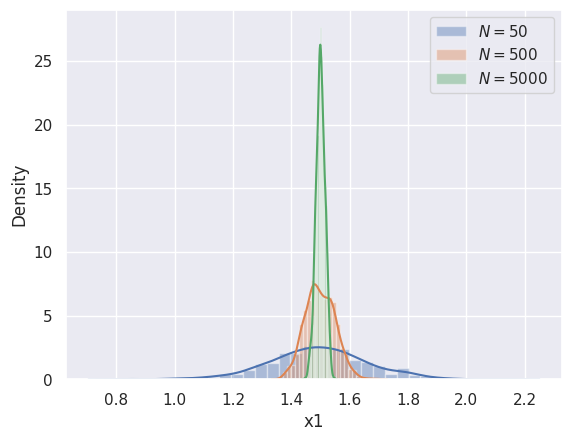

In [52]:
sns.distplot(results.x1, label='$N=50$')
sns.distplot(results2.x1, label='$N=500$')
sns.distplot(results3.x1, label='$N=5000$')
plt.legend();